# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations: The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
# Returns how many rows and columns are in the dataset
df.shape

(1898, 9)

#### Observations: There are 1,898 rows and 9 columns present in the dataset.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [4]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: There are integers, strings, and floats as the different datatypes of the columns within the dataset. The order_id and customer_id columns should be changed to categorical types as they are unique identifiers.


In [5]:
#Changing the data types of the order_id and customer_id columns
df = df.astype({"order_id": object, "customer_id": object})

#Check to see the changes have been made
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   object 
 1   customer_id            1898 non-null   object 
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 133.6+ KB


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [6]:
#This code checks the entire dataframe for missing or null values.
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: There are no missing values in the dataset. However, it should be noted that when the first rows of the dataset were observed a value of "Not given" was in the rating column. This does not mean the orders received a rating of 0. It just means the customer did not rate their order.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
#Provides a statistical summary of all the numerical columns of data in the data set
df.describe()

,cost_of_the_order,food_preparation_time,delivery_time
count,1898.000000,1898.000000,1898.000000
mean,16.498851,27.371970,24.161749
std,7.483812,4.632481,4.972637
min,4.470000,20.000000,15.000000
25%,12.080000,23.000000,20.000000
50%,14.140000,27.000000,25.000000
75%,22.297500,31.000000,28.000000
max,35.410000,35.000000,33.000000


#### Observations: The minimum time it takes for food to be be prepared once an order is places is 20 minutes, the average time it takes is 27.37 minutes, and the maximum time it takes is 35 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [8]:
#Organizing the data by the rating column and then counting how many values are assigned to the different ratings
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations: There are 736 orders that are not rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [9]:
#Checks the total number of unique order_ids in the data set
df['order_id'].count()  

1898

#### Observation on Order ID: There are 1,898 total unique_ids in the dataset and there are a total of 1,898 rows of data. This means that every order has a unique_id and there are no repeats in the dataset.

In [10]:
# This code checks the total number of unique customer_ids in the data set
df['customer_id'].nunique() 

1200

In [11]:
#This code finds the percentage of repeat customers and rounds that percentage to two decimal places.
customercount = df['customer_id'].count()
repeatcustomer = df['customer_id'].count() - df['customer_id'].nunique() 
rep_custom_percentage = round((repeatcustomer/customercount)*100,2)
rep_custom_percentage

36.78

#### Observation on Customer ID: 
There are 1,200 unique customer_ids. This means there are 698 repeat customers in the dataset. This means that 36.78% of FoodHub customers are repeat customer.

This is found by taking the number of repeat customer_ids, 698, and dividing it by the total number number of customer_ids, 1,898. That number is then multiplied by 100.

698/1898 * 100 = 36.78

In [12]:
#Checks the dataset for every unique restaurant_name 
df['restaurant_name'].nunique()

178

#### Observation on Restaurant Name: There are 178 unique restaurants in the data set that individuals have ordered from using FoodHub.

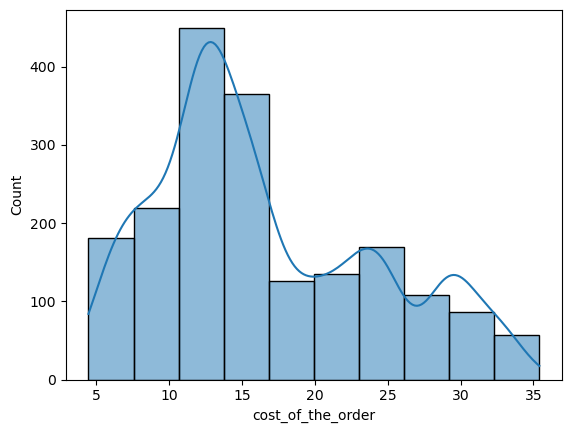

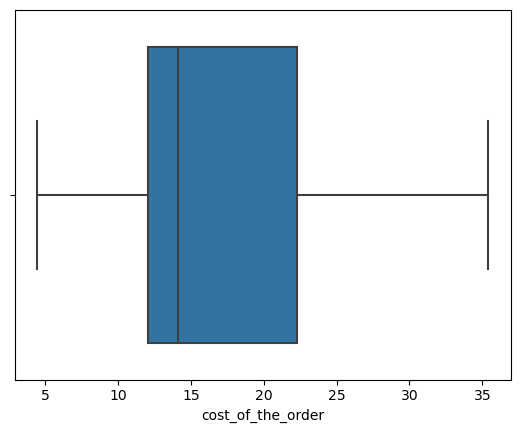

In [13]:
# Creates a histogram for the cost of orders, with 10 intervals or bins, and a KDE
sns.histplot(data = df, x='cost_of_the_order',bins = 10, kde=True)
plt.show()
#Creates a boxplot for the cost of orders
sns.boxplot(data = df, x='cost_of_the_order')
plt.show();

#### Observations on Cost of Orders:The histogram is right skewed towards lower costs, however there is another small peak at about the 25 dollar mark. The boxplot indicates the median cost of a meal is around the 13 dollar price range and is positively skewed. Both graphs indicate a larger spread above the median. 

In [14]:
#This code finds the number of unique cuisine types 
df['cuisine_type'].nunique()

14

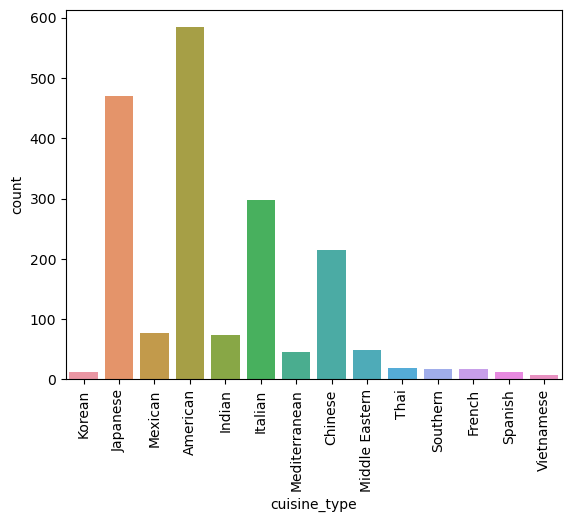

In [15]:
#Creates a counplot for the cusisine_types in the dataset
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

#### Observation on the Cuisine Types: The four most popular types of cuisine amongst FoodHub users are American, Japanese, Italian, and Chinese. It can also be observed that Inidian and Mexican cuisines have as similar amount of orders. Vietnamese cuisine has the least amount of orders.

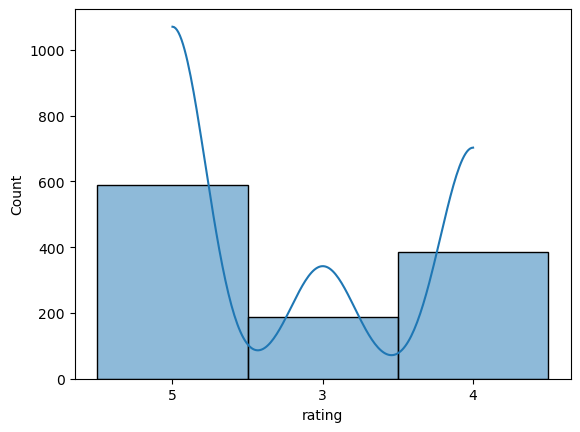

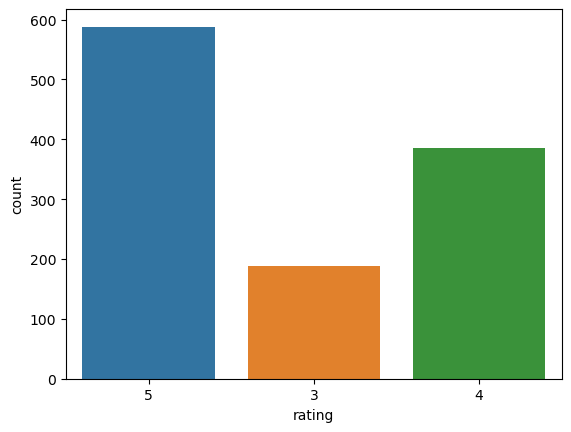

In [16]:
# For the rating graph, the "Not given" value is going to be removed to get the most accurate results and reduce bias 
rating_hist = df[df['rating']!= 'Not given']

sns.histplot(data = rating_hist, x='rating',bins = 4,stat = 'count',kde = True)
plt.show()
sns.countplot(data = rating_hist, x='rating')
plt.show();

#### Observations on Ratings: For the orders that recevied a rating, most orders recevied a rating of a maximum of 5.0. However, there is no data on what customers are taking into consideration when giving these ratings. The rating system that FoodHub uses could be something quick like a popup or something more complex that asks for customer feedback. It must also be considered that 736 orders did not receive any rating at all, which accounts for 38.78% of the data. The results of this data could be drastically different if those orders received a rating.  

In [17]:
#Checks the unique values of the week
df['day_of_the_week'].nunique()

2

In [18]:
#Takes the values assoicated with the day_of_the_week column and counts them
df['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

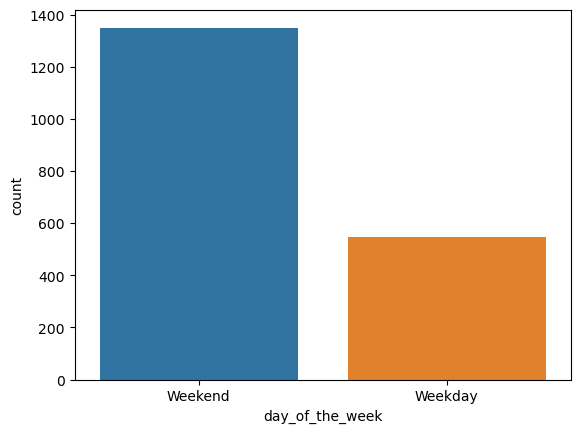

In [19]:
#Plots a bar graph for the day_of_the_week column and counts the number of values that are either Weekend or Weekday
sns.countplot(data=df,x='day_of_the_week')
plt.show()

#### Observations on Day of the Week: There are two different days of the week. In the dataset there are Weekday and Weekend. There are 1351 Weekend entries and 547 Weekday entries. Making the Weekend a more than twice as popular time for FoodHub orders.

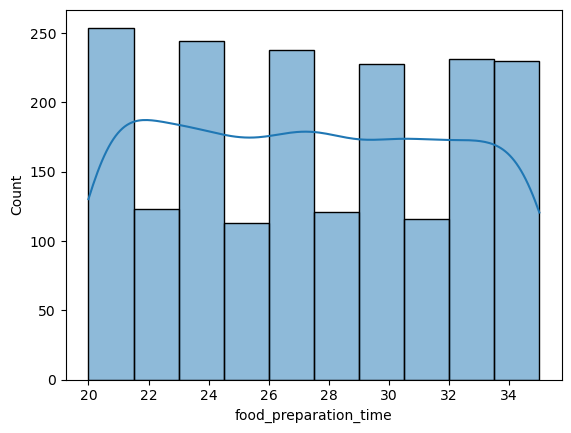

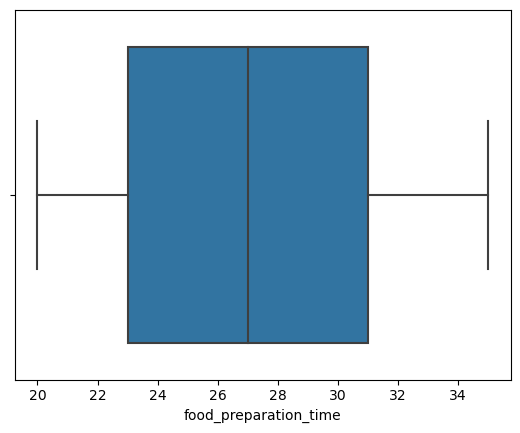

In [20]:
#Creates a histogram for the food_preparation_time column with 10 intervals or bins and a KDE
sns.histplot(data = df, x='food_preparation_time',bins = 10, stat = 'count',kde = True)
plt.show()
#Creates a boxplot for food_preparation_time column
sns.boxplot(data = df, x='food_preparation_time')
plt.show();

#### Observations on Food Preperation Time: The food_preperation_time has a relatively even distribution. The minimum time it takes to prepare food is 20 minutes, the maximum is 35 minutes, and the median is around 27 minutes.

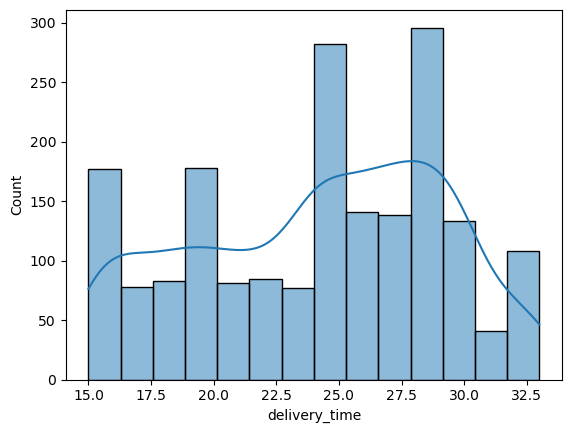

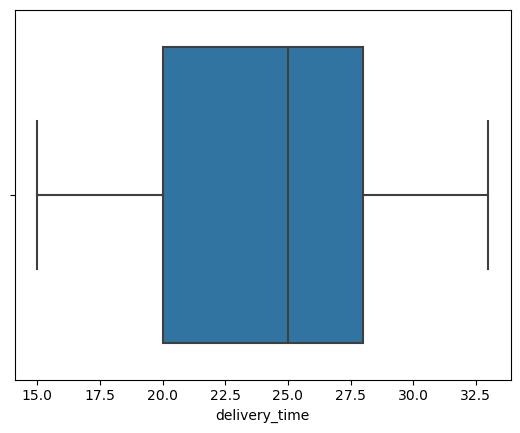

In [21]:
#Creates a histogram using delivery_time and sets a KDE
sns.histplot(data = df, x='delivery_time',kde = True,)
plt.show()
#Creates a boxolot using delivery_time
sns.boxplot(data = df, x='delivery_time')
plt.show();

#### Observations on Delivery Time: The boxplot is slightly left skewed with a median delivery time of 25 minutes, a minimum delivery time of 15 minutes, and maximum of 33 minutes. The histogram shows that most orders take either 25 or 28 minutes to be delivered.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [22]:
# Sorts the dataset by restaurant_name and order_id, groups by restaurant_name, does a count, and sorts the top 5 
#values by descending order in rows
top = df[['restaurant_name','order_id']].groupby('restaurant_name').count()
top.sort_values(by = 'order_id',axis = 0, ascending=False).head()

,order_id
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations: The top 5 restaurants with the most orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [23]:
# Sorts the data by day_of_the_week, only by Weekend, then groups the data by the type of cuisine and counts it,
# then sorts the values by the order_id for each cuisine, and puts the data in a descending order by row and displays the top 5
pc = df[df['day_of_the_week'] =='Weekend'].groupby('cuisine_type').count()
pc.sort_values(by = 'order_id',axis = 0, ascending=False).head()

,order_id,customer_id,restaurant_name,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
cuisine_type,,,,,,,,
American,415,415,415,415,415,415,415,415
Japanese,335,335,335,335,335,335,335,335
Italian,207,207,207,207,207,207,207,207
Chinese,163,163,163,163,163,163,163,163
Mexican,53,53,53,53,53,53,53,53


#### Observations: American cuisine is the most popular on weekends with 415 orders.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [24]:
#Does a count of the total number of order
total_cost_count = df['cost_of_the_order'].count()
#Does a count of all the orders that cost more than 20 dollars
orders_cost_above20 = df['cost_of_the_order'][df['cost_of_the_order']> 20].count()
#Finds the percentage of orders that cost more than 20 dollars and then rounds to two decimal places
percentage_above20 = round((orders_cost_above20/total_cost_count)*100,2)

percentage_above20

29.24

#### Observations: 29.24% of the total order cost more than 20 dollars.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [25]:
# Finds the mean of the delivery time column and rounds the mean to two decimal places
df['delivery_time'].mean()
round(df['delivery_time'].mean(),2)

24.16

#### Observations: The mean order delivery time for the dataset is 24.16 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [26]:
#Gets the counts of each customer_id and displays the top 3 customers
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations: The 3 most frequent customers who will recevie a 20% discount voucher are customer 52832, 47440, and 83287. Customer 52832 has placed 13 orders, customer 47440 has placed 10 orders, and customer 83287 has placed 9 orders.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


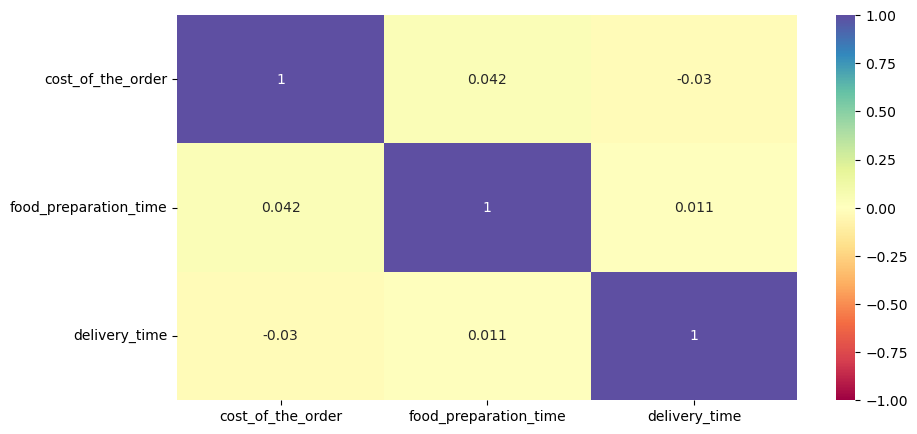

In [27]:
#Creates a heatmap of the different variables
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(10,5))
sns.heatmap(df[col_list].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

#### Heatmap Observations: There is very weak correlation between any of the variables. This means none of the variables share a significant relationship with one another.

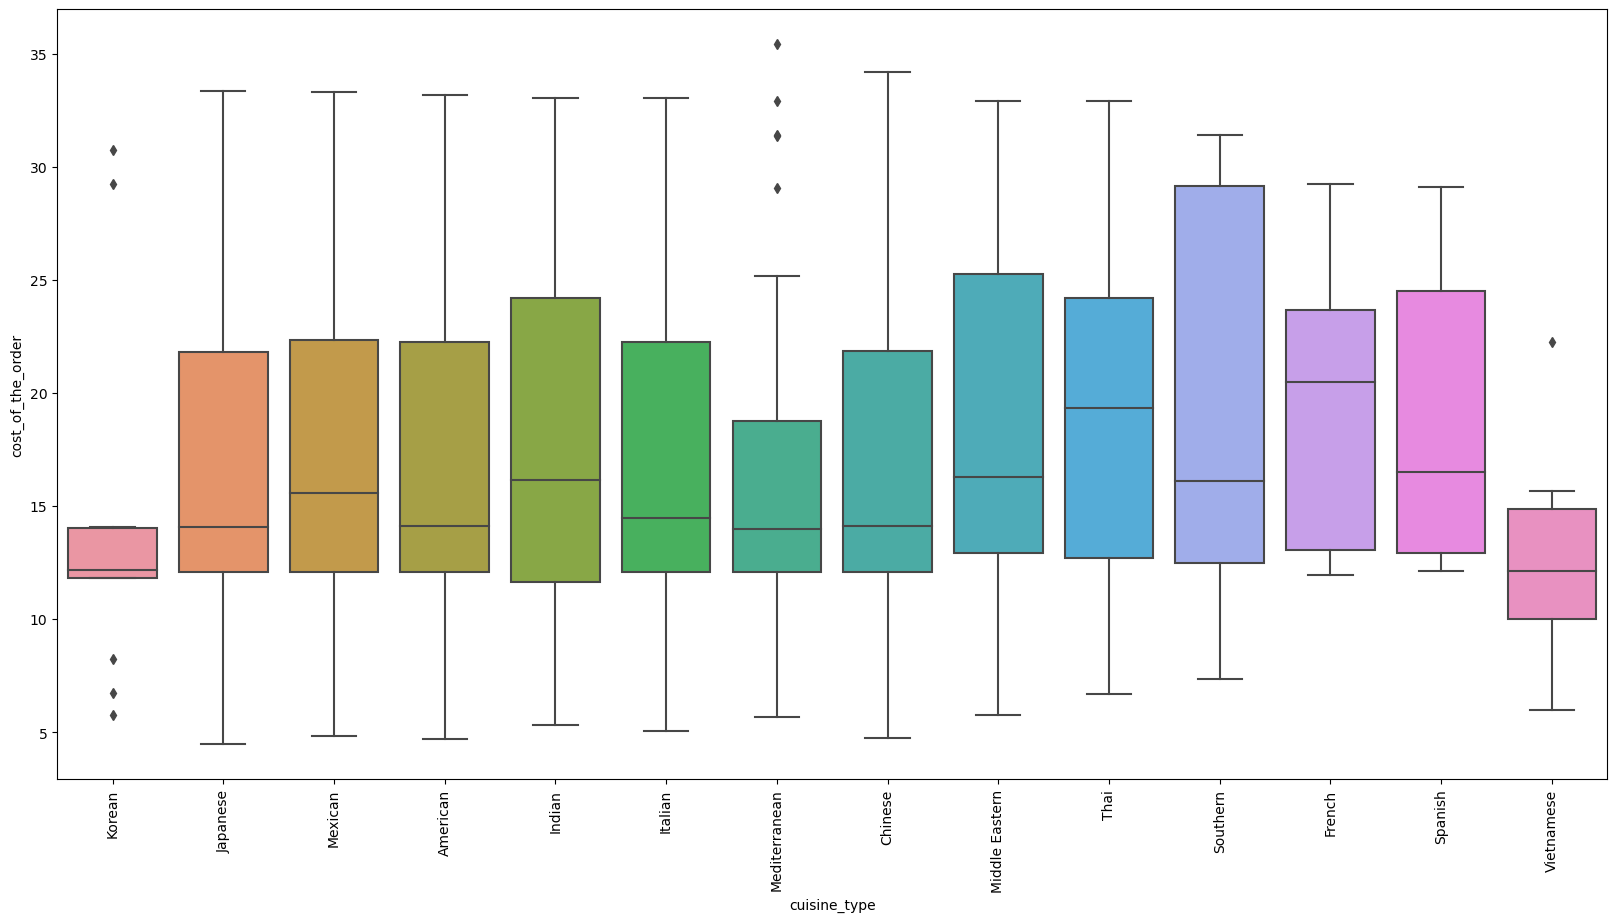

In [28]:
#Creates boxplots that show the cuisine type in relation to the cost of the order
plt.figure(figsize=(20,10))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df,)
plt.xticks(rotation = 90)
plt.show()

#### Observations on Cuisine Type vs. Cost of the Order: Korean, Mediterranean, and Vietnamese cuisines all have outliers. Majority of the boxplots are right skewed. Mediterranean cuisine has the most expensive order wheras Japanese and Chinese cuisine have the cheapeast orders. 

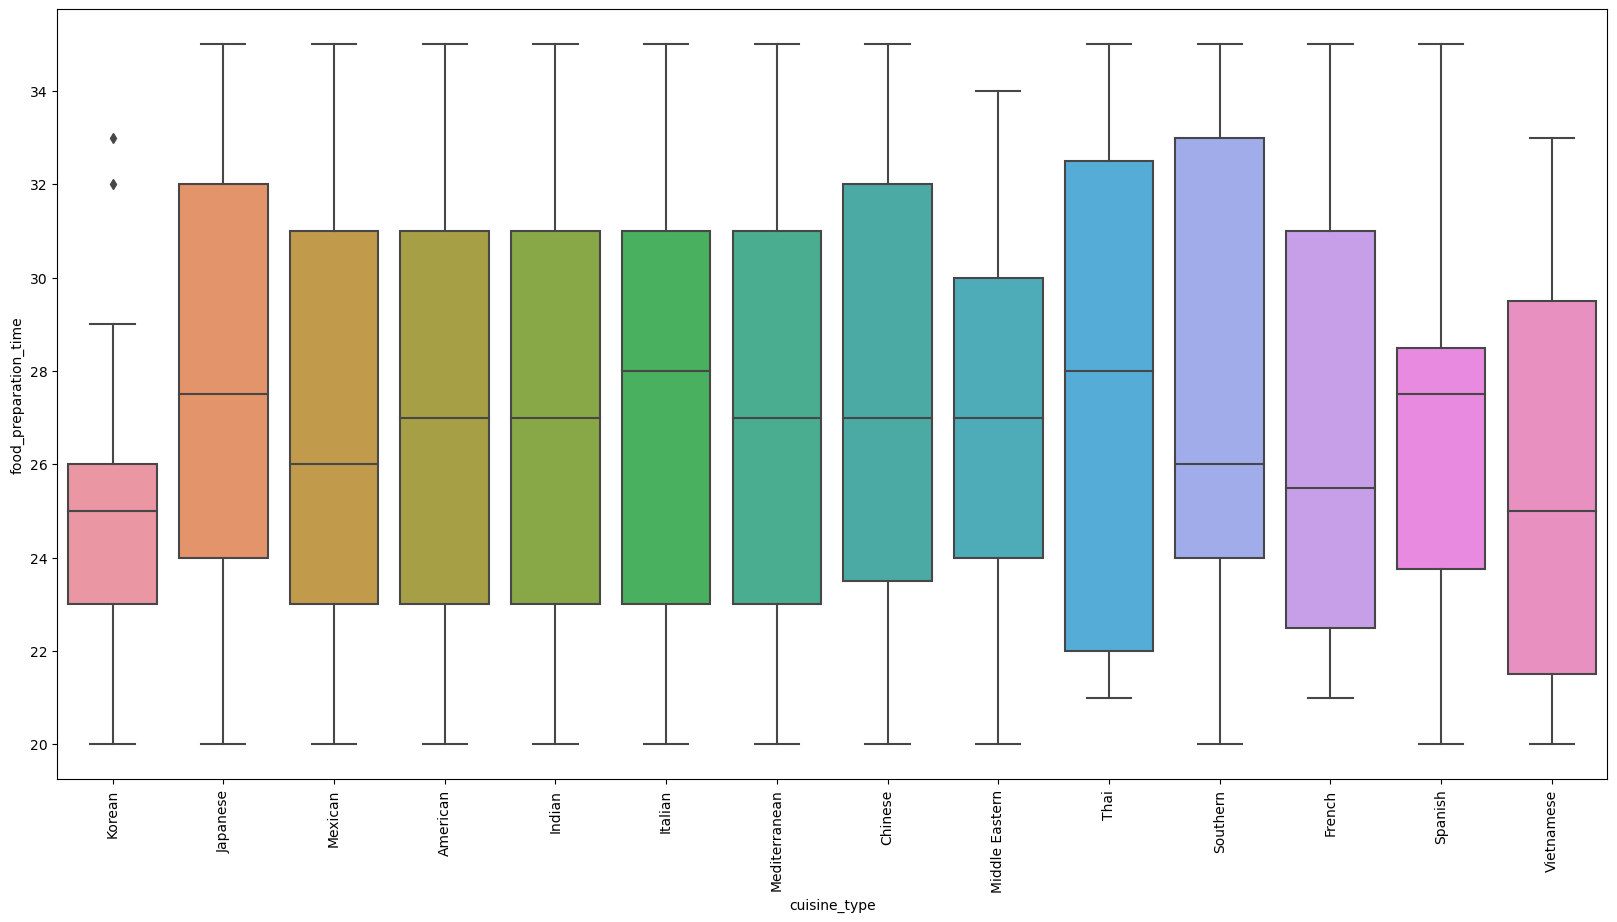

In [29]:
#Creates a boxplot for each cuisine type in relation to food preparation time
plt.figure(figsize=(20,10))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df,)  
plt.xticks(rotation = 90)
plt.show()

#### Observations on Cuisine Type vs. Food Preparation Time: Korean cuisine is the only type with outliers. There are many graphs with normal or near normal dsitribution with a median of around 27 minutes. The maximum time it took to prepare orders was 35 minutes and the minimum was 20.

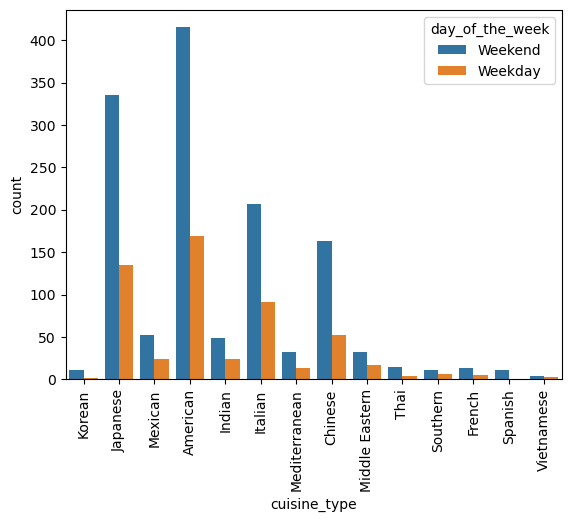

In [30]:
#Creates a countplot of cusine types for different days of the week
sns.countplot(data=df,x='cuisine_type',hue= 'day_of_the_week')
plt.xticks(rotation=90)
plt.show()

#### Observations on Cuisine Type vs. Day of the Week: Populartiy follows a steady trend despite day of the week. It is known that FoodHub is busier during the Weekends which accounts for the larger count in orders vs. the Weekdays. More than double the amount of orders can be seen for cuisines like American, Japanese, and Italian on the Weekends.

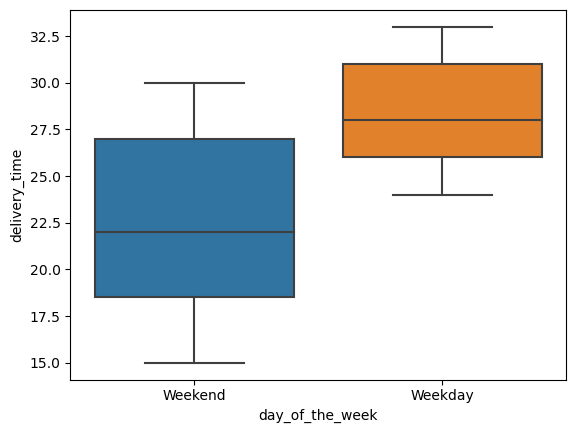

In [31]:
#Create box plots of day of the week vs delivery time
sns.boxplot(data=df,x='day_of_the_week',y='delivery_time') 
plt.show()

#### Observations on Day of the Week vs. Delivery Time: Delivery time on the Weekend is much lower than that on the Weekdays. Lowest time on the Weekend is 15 minutes whereas on the Weekdays it's about 23.75 minutes. Highest delivery time during the Weekend is 30 minutes and 33 minutes during the Weekday. Median delivery time during the Weekend is around 22.5 and during the Weekdays is 27.5.

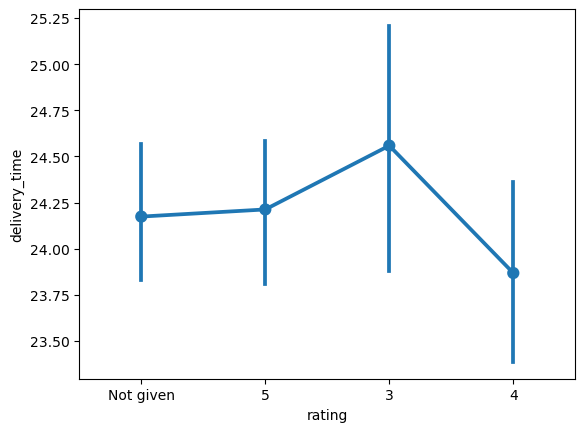

In [32]:
#Creates a pointplot showing the relationship between rating and delivery time
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

#### Observations on Rating vs. Delivery Time: Orders that received a 3 rating have the highest delivery time. Orders that received a 4 had the lowest delivery times. What is very interesting is orders that received no rating and orders that received a 5 have very similar delivery times. Perhaps customers who did not rate are satisfied customers who don't feel compelled to give a rating. It seems that delivery time could play a factor into why customers give a lower rating.

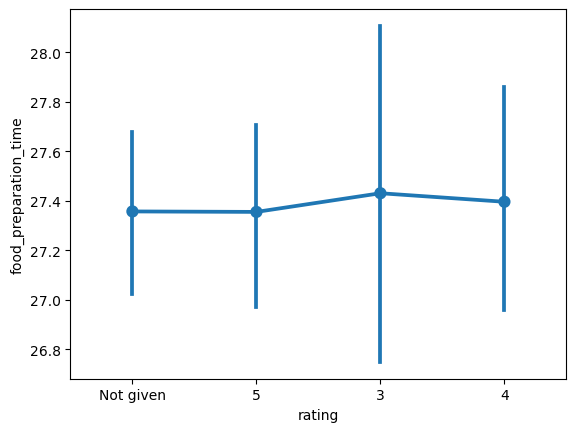

In [33]:
#Creates a pointplot for rating in relation to food preparation time 
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df) 
plt.show()

#### Observations on Rating vs Food Preparation Time: Orders that received a rating of 3 have the lowest and highest variation in food preparation time. Similarly to the last graph, orders that received no rating and a 5 have similar food preparation times. 

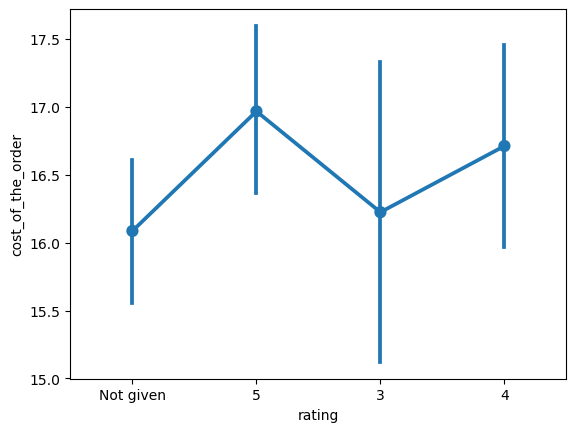

In [34]:
#Creates a pointplot for rating in relation to cost of the order
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df) 
plt.show()

#### Observations on Rating vs Cost of the Order: Orders that received a 3 had the lowest cost. Orders that received a 5 had the highest cost. Again, it seems the more variation in the order the more likely the order is to receive the lower score of 3.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [35]:
#Filters the rating column only by those which have received a rating
df_rated = df[df['rating'] != 'Not given'].copy()

#Convert the rating column from an object to an integer 
df_rated['rating'] = df_rated['rating'].astype('int')  

# Create a new dataframe that has the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head() 

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [36]:
#Obtain the restaurant names that have a rating count of more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name'] 

# Filter to get the data of restaurants that have a rating count of more than 50
df_mean = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() 

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations: The restaurants that will receive the promotional offer are The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack, and Blue Ribbon Sushi.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [37]:
# Create two variables one for revenue and income
revenue = 0
income = 0
# Create a Pandas series of the cost of order column
cost = pd.Series(df['cost_of_the_order'])
# Create a for loop to loop through the series to calculate the income and add it to the revenue variable 
for i in range(len(cost)):
    if (cost[i] > 5) & (cost[i] < 20):
        income = cost[i]*0.15
    elif (cost[i] > 20):
        income = cost[i]*0.25
    else:
        income = 0
    revenue = revenue + income
#Rounds the revenue variable to two decimal places   
round (revenue,2)

6166.3

#### Observations: The net revenue generated by the company across all orders is $6,166.30


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [38]:
# Creates a new column for the total_time required to deliver the food
df['total_time'] = df['food_preparation_time']+df['delivery_time']
#Checking to confirm the new column exists
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


In [39]:
#Computes the percentage of orders taking more than 60 minutes
total_time_count = df['total_time'].count()
ordertime_above60 = df['total_time'][df['total_time']> 60].count()

percent_above60min = round((ordertime_above60/total_time_count)*100,2)
percent_above60min

10.54

#### Observations: 10.54% of order take more than 60 to get delivered from the time the order is placed.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [40]:
# Groups the dataset by day of the week and the delivery time and calculates the mean 
df.groupby(['day_of_the_week'])['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations: The average delivery time on Weekdays is higher than Weekends. The mean time on a Weekday is 28.34 minutes and on the Weekend it's 22.47 minutes. 

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Majority of customers who rated their orders gave their order a 5. This could mean that customers are more likely to rate their order when they are very satisfied with FoodHub's services. However, 38.78% of customers did not rate their orders. More analysis needs to be done to see whether these extra percentage of ratings would cause a skew in the rating data.  
* The average FoodHub user is looking for a meal that will cost around 13 dollars. However, we can see another small peak around the 25 dollar mark. This could be attributed to the demogrpahic of FoodHub users which are working professionals and college students. More data would need to be gathered like profession of who is ordering.
* The same cuisines are in high demand regardless of whether it is a Weekend or Weekday.
* Preparation time is far more consistent than delivery time. Delivery time takes up more time in the total preparation time for an order.

### Recommendations:

* FoodHub should come up with some sort of incentive to encourage customers to rate their orders. Perhaps, they can offer a rewards a system that offers discounts or merch. The rating category needs to have more data to see if there's any correlation between rating and any of the other variables. I would even recommend that FoodHub make the rating system more interactive for user's to boost overall customer satisfaction.
* To increase revenue on Weekdays, FoodHub should look into marketing or advertising to boost sales and encourage users to place orders during the week. FoodHub's main customers are working professionals and students. These are individuals who live busy lives and maybe don't have time to cook a meal during the Weekdays. FoodHub could center an ad around this.
* To decrease delivery time on the Weekdays, FoodHub should look into different transportation methods for delivery drivers and gather data on which transportation methods are most time efficient. Being in a city like New York, offers many means of transportation. High delivery times could be a factor in why less people are willing to place orders during Weekdays.
* FoodHub should focus on integrating more restaurants onto their app that have cuisine types that are popular amongst customers and remove some of the restaurants that do not drive sales. This could improve customer satisfaction and boost sales.



---